Updated Weight and Bias Values:
Weights (Input to Hidden): [[0.27946375 0.22657792 0.31974061]]
Weights (Hidden to Output): [[0.68797272]
 [0.0522793 ]
 [0.09933329]]
Bias (Hidden): [0.08160475 0.86883196 0.93669451]
Bias (Output): [-0.260035]


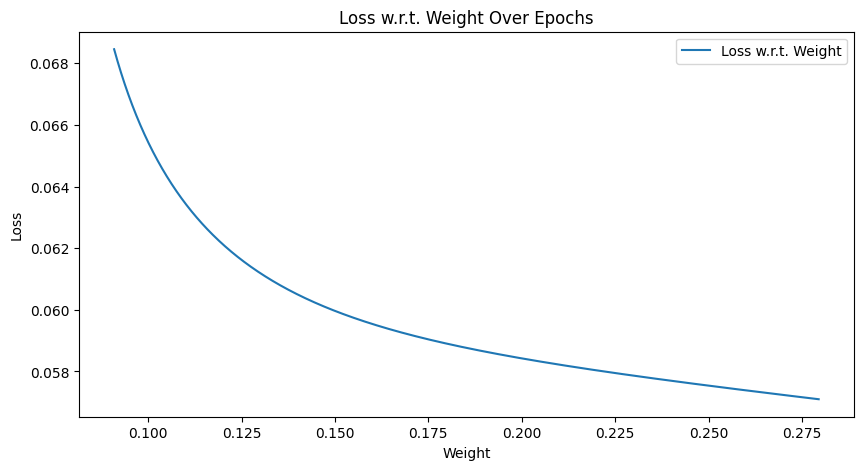

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_loss(X, Y, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    # Calculate output of Neural Network
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Calculate squared error loss
    loss = 0.5 * np.mean((Y - final_output)**2)

    return final_output, loss

def update_weights(X, Y, learning_rate, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    # Calculate output of Neural Network
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Backpropagation
    output_delta = (Y - final_output) * final_output * (1 - final_output)
    hidden_delta = np.dot(output_delta, weights_hidden_output.T) * hidden_output * (1 - hidden_output)

    # Update weights using batch gradient descent
    weights_hidden_output += learning_rate * np.dot(hidden_output.T, output_delta)
    bias_output += learning_rate * np.sum(output_delta, axis=0)

    weights_input_hidden += learning_rate * np.dot(X.T, hidden_delta)
    bias_hidden += learning_rate * np.sum(hidden_delta, axis=0)

    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

# Step a: Define initial data
X = np.array([[0.5], [2.5]])
Y = np.array([[0.2], [0.9]])

# Step b: Initialize a neural network with random weights
input_size = 1
hidden_size = 3
output_size = 1

weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

bias_hidden = np.random.rand(hidden_size)
bias_output = np.random.rand(output_size)

# Step c: Batch Gradient Descent Optimization
learning_rate = 0.01
num_epochs = 1000

loss_history = []
weight_history = []

for epoch in range(num_epochs):
    # Calculate squared error loss and update weights
    final_output, loss = compute_loss(X, Y, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
    weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = update_weights(
        X, Y, learning_rate, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output
    )

    loss_history.append(loss)
    weight_history.append(weights_input_hidden[0, 0])  # Assuming a single weight for simplicity

# Step iii: Display updated weight and bias values
print("Updated Weight and Bias Values:")
print("Weights (Input to Hidden):", weights_input_hidden)
print("Weights (Hidden to Output):", weights_hidden_output)
print("Bias (Hidden):", bias_hidden)
print("Bias (Output):", bias_output)

# Step iv: Plot loss w.r.t. weight values
plt.figure(figsize=(10, 5))
plt.plot(weight_history, loss_history, label='Loss w.r.t. Weight')
plt.title('Loss w.r.t. Weight Over Epochs')
plt.xlabel('Weight')
plt.ylabel('Loss')
plt.legend()
plt.show()
